# Using Rust as a FFI from Scala vs Scala

### (FFI - Foreign Function Interface)

### Using a sum of fibonacci numbers up to a given value

### Notes

Scala had a far more stringent limit on max integer size than rust. The tests were run up to the max number scala could cope with.
rust timings from the system clock had a limit of macroseconds where as scala ran down to nano seconds. For scala the time was rounded down to nearest macrosecond

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dir_date = "20201121-2225"
# dir_date = "20201026-2016"


In [3]:
def read_timing_data(filename, dir_date):
    data = pd.read_csv("../data/" + dir_date + "/" + filename + ".csv", header=None, names=["time"])['time'].tolist()
    data.sort()
    return data

In [4]:
cols = ['time']
rust_debug_data              = read_timing_data("rust-debug-results", dir_date)
rust_release_data            = read_timing_data("rust-release-results", dir_date)
scala_data                   = read_timing_data("scala-results", dir_date)
scala_improved_data          = read_timing_data("scala-improved-results", dir_date)
pure_rust_match_data         = read_timing_data("pure-rust-match", dir_date)
pure_rust_unsafe_unwrap_data = read_timing_data("pure-rust-unsafe-unwrap", dir_date)


In [5]:
data = {
    'scala': scala_data, 
    'rust_debug': rust_debug_data, 
    'rust_release': rust_release_data, 
    'scala_improved': scala_improved_data,
    'pure_rust_match': pure_rust_match_data,
    'pure_rust_unsafe_unwrap': pure_rust_unsafe_unwrap_data 
}

In [6]:
def plot_data(description, dict_data, display_labels, top_and_tail_percentages):
    plt_len = len(top_and_tail_percentages)
#     print("length of array: " + str(plt_len))
    plt_width = 2 if plt_len > 1 else 1
    plt_height = (plt_len + 1) // 2
    plt.rcParams["figure.figsize"] = (10 * plt_width, 7 * plt_height)
#     print("plt width/height: (" + str(plt_width) + "," + str(plt_height)+")")
    f, ax = plt.subplots(ncols=plt_width, nrows=plt_height, squeeze=False)
    f.figsize = (20,10)
    for idx, top_and_tail_percentage in enumerate(top_and_tail_percentages):
        ix = idx % 2
        iy = int(idx / 2) 
#         print("ax width/height: (" + str(ix) + "," + str(iy)+")")
        for label in display_labels:
            if top_and_tail_percentage == 0: 
                ax[iy][ix].plot(dict_data[label], label=label)
                ax[iy][ix].set_title(description)
            else:
                ax[iy][ix].plot(dict_data[label][top_and_tail_percentage:][:-top_and_tail_percentage], label=label)
                ax[iy][ix].set_title(description + "\n("+str(top_and_tail_percentage)+"% higtest and "+str(top_and_tail_percentage)+"% lowest values removed)")
        ax[iy][ix].legend(loc = 'best')
        ax[iy][ix].set_ylabel("duration (μs)")
        ax[iy][ix].set_xlabel("run")
        ax[iy][ix].set_ylim(0)

    plt.show()

### Here we display the full timings against each other

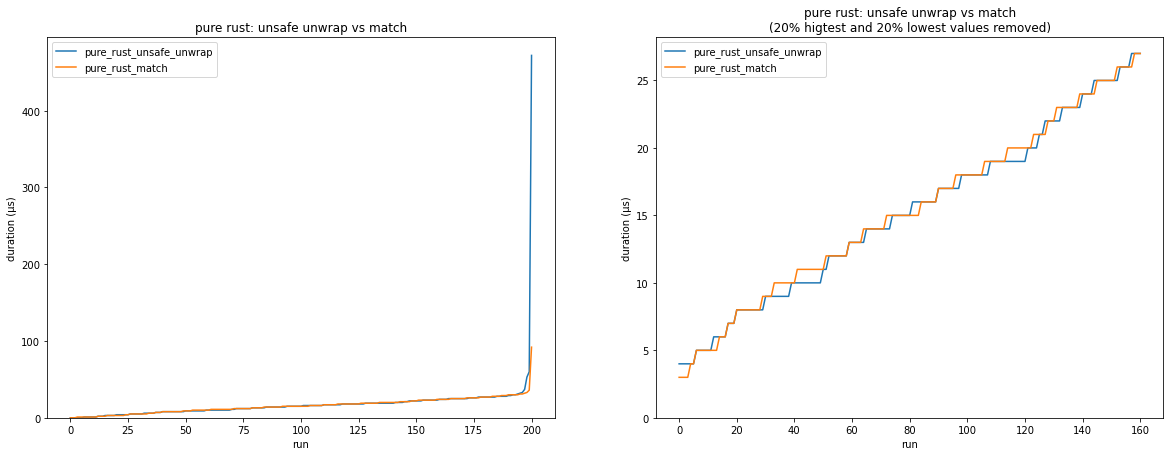

In [7]:
plot_data('pure rust: unsafe unwrap vs match', data, ['pure_rust_unsafe_unwrap', 'pure_rust_match'], [0, 20])

### Comparing rust against rust from scala

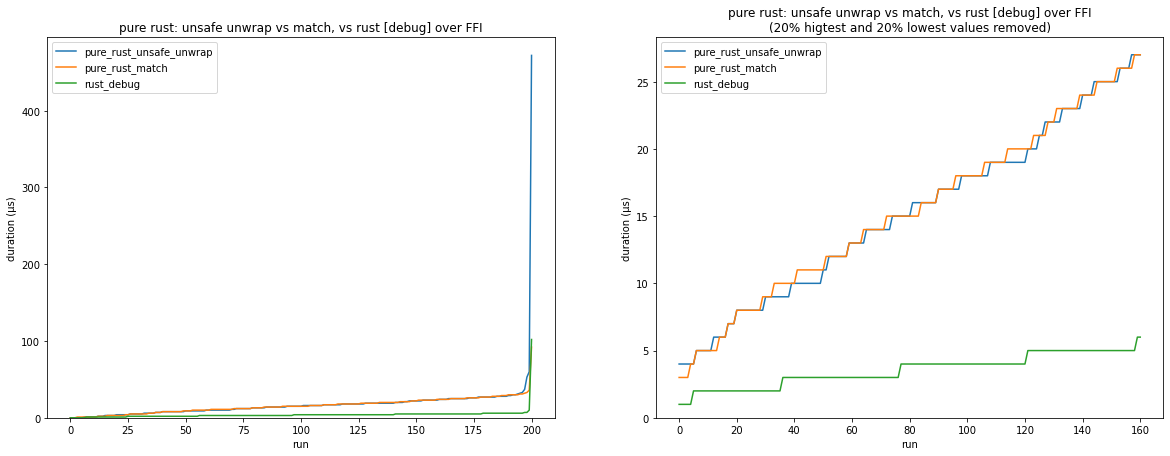

In [8]:
plot_data('pure rust: unsafe unwrap vs match, vs rust [debug] over FFI', data, ['pure_rust_unsafe_unwrap', 'pure_rust_match', "rust_debug"], [0, 20])

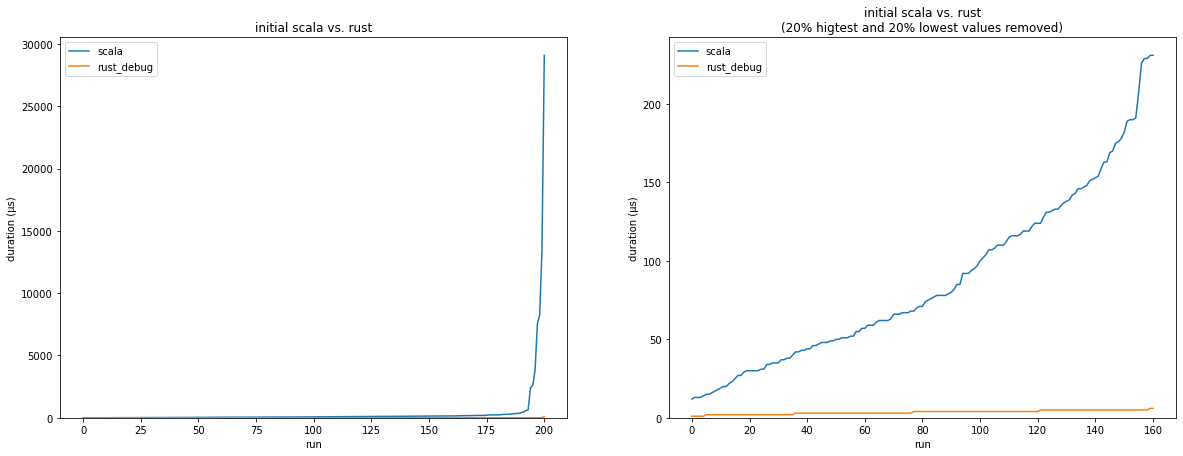

In [9]:
plot_data('initial scala vs. rust', data, ['scala', 'rust_debug'], [0, 20])

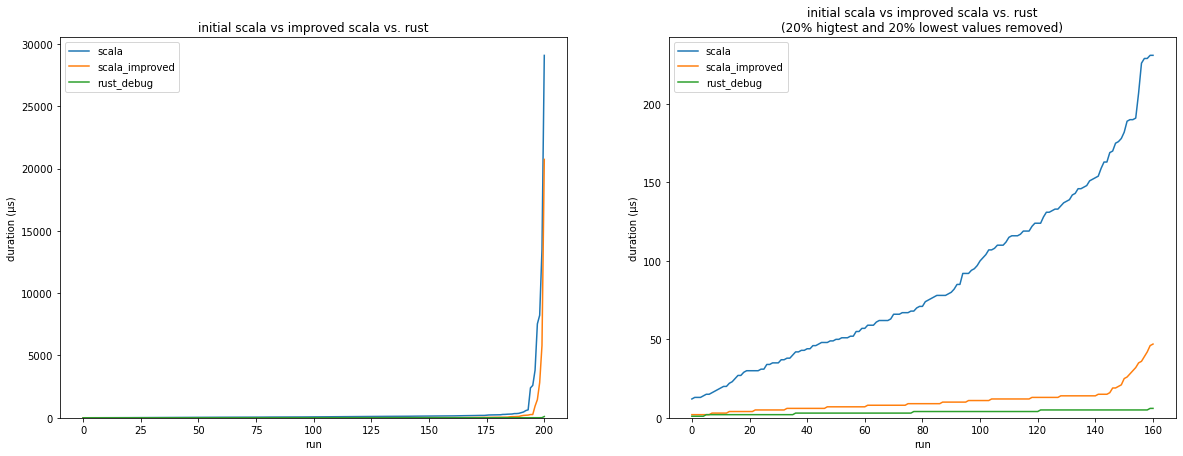

In [10]:
plot_data('initial scala vs improved scala vs. rust', data, ['scala', 'scala_improved', 'rust_debug'], [0, 20])

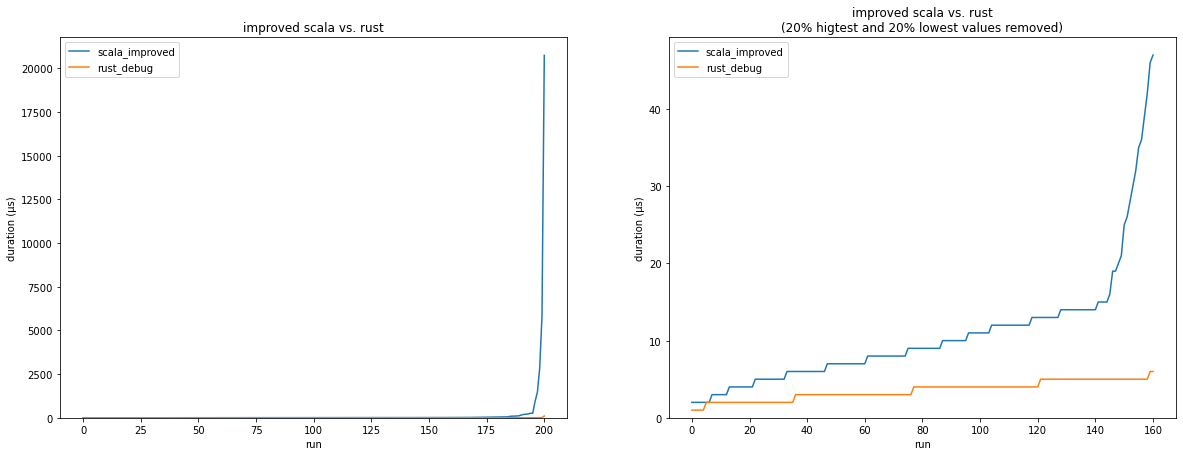

In [11]:
plot_data('improved scala vs. rust', data, ['scala_improved', 'rust_debug'], [0, 20])

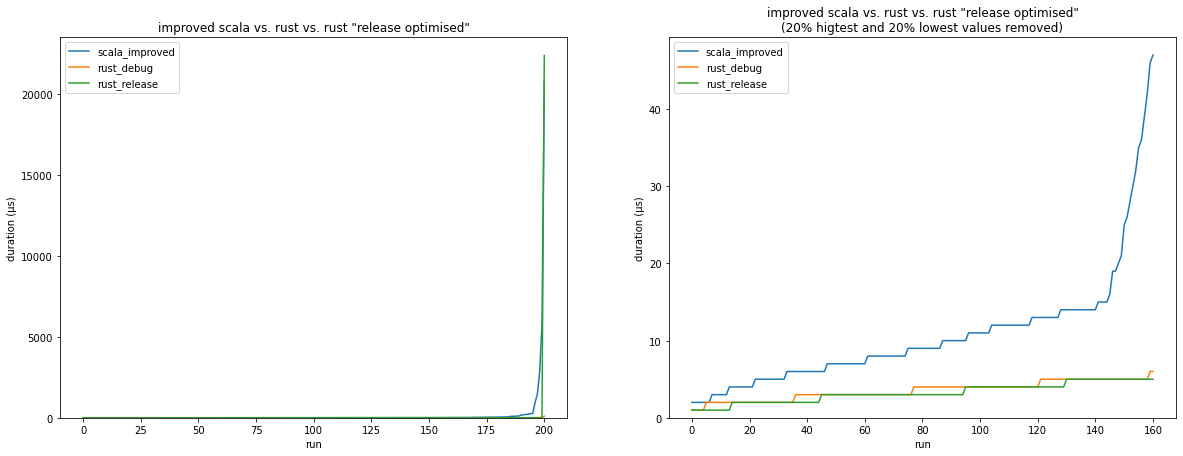

In [12]:
plot_data('improved scala vs. rust vs. rust "release optimised"', data, ['scala_improved', 'rust_debug', 'rust_release'], [0, 20])

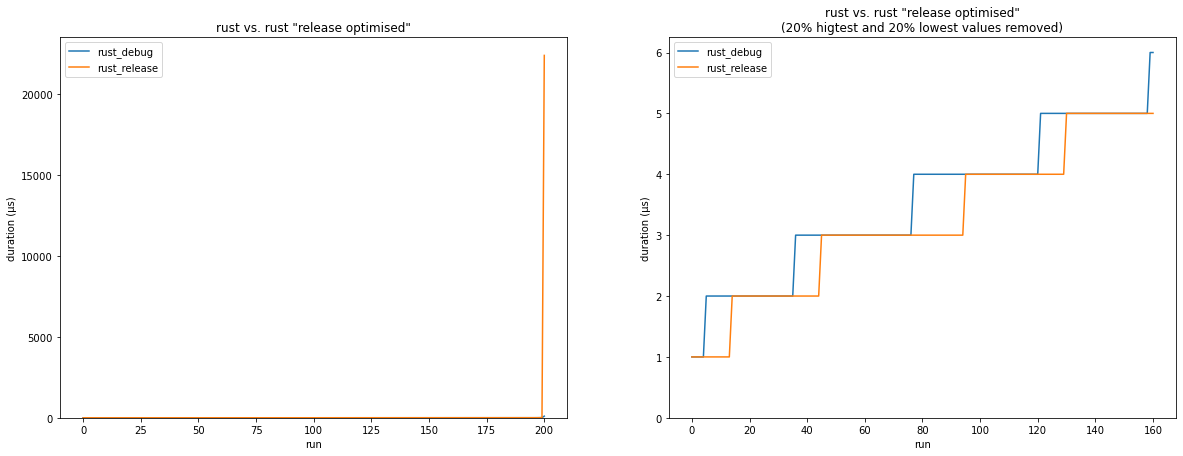

In [14]:
plot_data('rust vs. rust "release optimised"', data, ['rust_debug', 'rust_release'], [0, 20])

### Here we'll take just the mid-section timings only

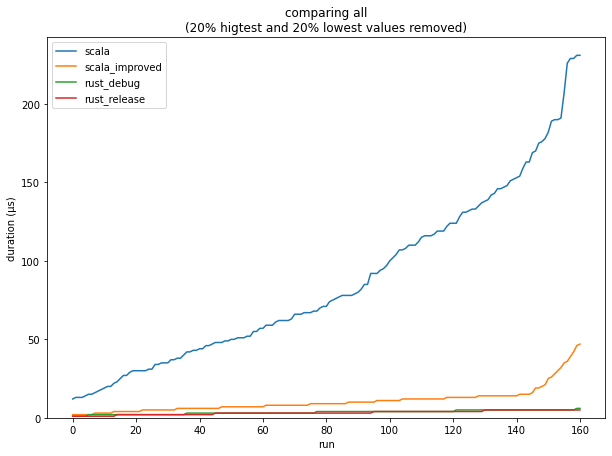

In [13]:
plot_data("comparing all", data, ["scala", "scala_improved", 'rust_debug', 'rust_release'], [20])